In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("avm_customer.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [7]:
df.rename(columns = {'Annual Income (k$)' : 'Income'} , inplace = True)
df.rename(columns = {'Spending Score (1-100)': 'Score'} , inplace = True)
df.head()

,CustomerID,Income,Score
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


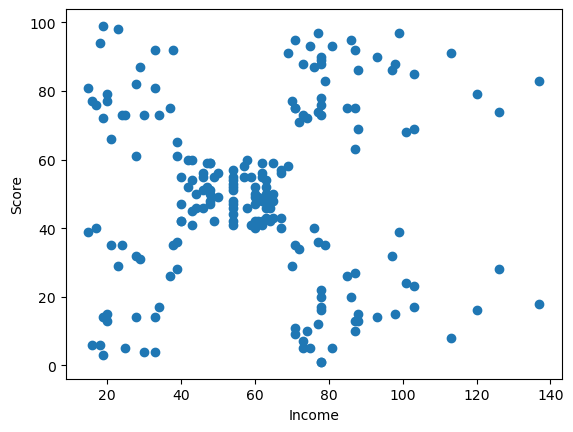

In [8]:
plt.scatter(df['Income'],df['Score'])
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [13]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Score']])
df['Score'] = scaler.transform(df[['Score']])

df.tail()

,CustomerID,Income,Score
195,196,0.860656,0.795918
196,197,0.909836,0.275510
197,198,0.909836,0.744898
198,199,1.000000,0.173469
199,200,1.000000,0.836735


In [17]:
k_range = range(1,11)
list_dist = []

for k in k_range:
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(df[['Income','Score']])
    list_dist.append(kmeans_model.inertia_)

C:\Users\Sena Bayaz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


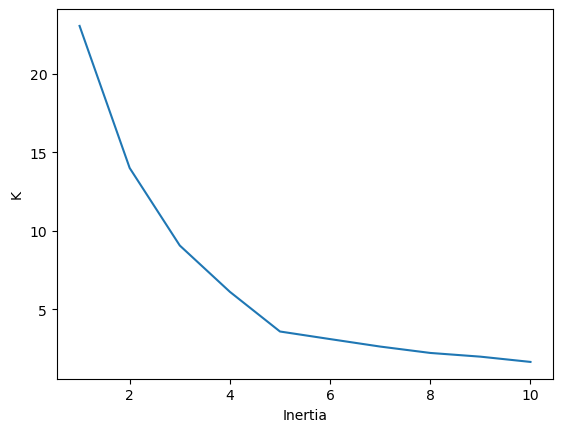

In [23]:
plt.plot(k_range,list_dist)
plt.xlabel("Inertia")
plt.ylabel("K")
plt.show()

In [22]:
kmenas_model = KMeans(n_clusters = 5)
y_predict = kmeans_model.fit_predict(df[['Income','Score']])
y_predict

array([0, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 3, 0, 3,
       4, 3, 4, 3, 0, 9, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 3, 0, 9,
       0, 9, 9, 9, 0, 0, 9, 9, 9, 9, 9, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 5, 9, 9, 5, 9, 9, 9, 9, 5, 9, 9, 5, 5, 9, 5, 9, 9,
       9, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 9, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 1, 5, 8, 5, 1, 7, 8, 7, 8,
       5, 8, 7, 1, 7, 8, 7, 8, 7, 1, 5, 1, 7, 1, 5, 8, 7, 1, 7, 1, 7, 8,
       7, 1, 7, 8, 7, 8, 5, 1, 7, 1, 7, 8, 7, 1, 7, 8, 7, 8, 7, 1, 7, 1,
       7, 8, 7, 1, 2, 6, 2, 6, 2, 1, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6,
       2, 6])

In [24]:
df['cluster'] = y_predict
df.head()

,CustomerID,Income,Score,cluster
0,1,0.000000,0.387755,0
1,2,0.000000,0.816327,3
2,3,0.008197,0.051020,4
3,4,0.008197,0.775510,3
4,5,0.016393,0.397959,0


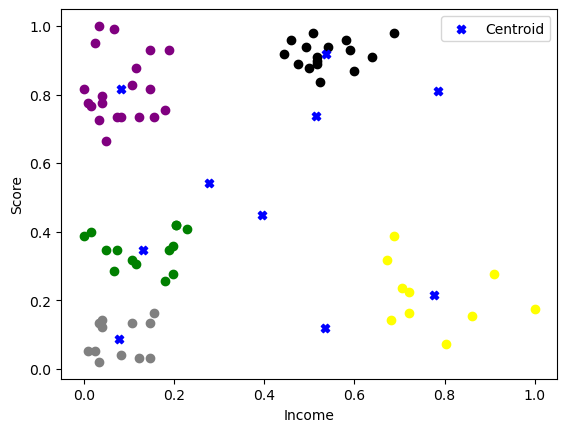

In [32]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.xlabel("Income")
plt.ylabel("Score")
plt.scatter(df1['Income'],df1['Score'],color='green')
plt.scatter(df2['Income'],df2['Score'],color='black')
plt.scatter(df3['Income'],df3['Score'],color='yellow')
plt.scatter(df4['Income'],df4['Score'],color='purple')
plt.scatter(df5['Income'],df5['Score'],color='grey')

plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],color='blue',marker='X',label='Centroid')
plt.legend()
plt.show()